# Naive Bayes for Classifying Music Emotions
---
## About the Dataset

For this experiment, our dataset contains 267 music samples that were labelled by 2 music experts. The dataset has a combination of high level and low level features. The high level features are tempo, arousal, and scale, which were all labelled by the music experts. The low level features were extracted from the music samples using the JAudio software.

---
## Libraries

We used the pandas and csv libraries to load the dataset, which is a csv file. Then we used numpy to manipulate the loaded dataset. We used the sci kit learn library for the Naive Bayes algorithms. The XLB file is where we modularized the training and validation process

In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import CategoricalNB, ComplementNB, MultinomialNB, GaussianNB
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, VarianceThreshold, chi2, f_classif, mutual_info_classif
from sklearn import svm
from XLB import *

import warnings
warnings.filterwarnings('ignore')

Here we load the data from the csv file and preprocess it by removing the header row and the filename column this is done by the extract_data function from the XLB file which takes the filename of the dataset as a parameter

---

After the initial preprocessing step, we sperated the music features and the labelled emotion into the x_train and y_train arrays respectively. We also used the scikit learn min max scaler to normalize the dataset.

In [2]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=50,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
feat_sel_2 = SelectFromModel(\
                estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
                                    random_state=481516234))
# feat_sel_2 = SelectKBest(f_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 51) (750,)
(750, 51) (750,)


Here we perform different methods to deal with imbalanced datasets. We used the oversampling and SMOTE methodology 

In [3]:
themes = ["Calm","Cheerful","Bravery","Fearful","Love","Sadness"]

The following cells are the experiments we ran with the default dataset, oversampled version, and SMOTE version using random search as the hyperparameter search algorithm

---
This cell instantiates the Gaussian Naive Bayes object and the hyperparameter search object.

In [4]:
# GaussianNB, RandomizedSearch
random_search_iterations = 2000
k_folds = 10
rand_seed = 3249807

parameters = {
    'var_smoothing' : np.logspace(-10,-1,1000000)
}
gnb = GaussianNB()
random_search_gaussian = RandomizedSearchCV(gnb, parameters,cv=k_folds,\
                                              n_iter=random_search_iterations,\
                                              random_state=rand_seed,n_jobs=-1)

The following cells are where the Gaussian Naive Bayes model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set

Best Score: 0.2243
Vanilla Train Accuracy: 26.6833%
[ 6.  3.  2.  5.  2.  3.  5.  3.  6.  6.  3.  2.  6.  6.  3.  2.  6.  3.
  2.  5.  2.]
[ 1.  1.  1.  1.  2.  2.  2.  3.  3.  3.  3.  4.  4.  4.  4.  5.  5.  5.
  6.  6.  6.]
Vanilla Validation Accuracy: 14.29%
Vanilla F1-score: 0.11
Vanilla Precision Score: 0.09
Vanilla Recall Score: 0.14
Vanilla ROC-AUC Score: 0.50
Vanilla ROC-AUC Score: 0.53
Vanilla ROC-AUC Score: 0.63
Vanilla ROC-AUC Score: 0.50
Vanilla ROC-AUC Score: 0.42
Vanilla ROC-AUC Score: 0.33


(14.285714285714285, 0.10793650793650793)

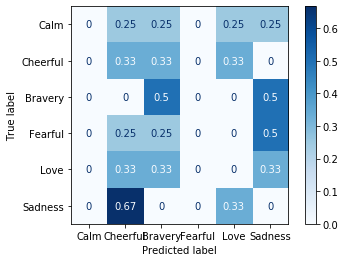

In [5]:
print_res_6_way("Vanilla",x_train,y_train,random_search_gaussian, themes, verbose = False)
test_res_6_way("Vanilla",x_val,y_val,random_search_gaussian, themes)

Best Score: 0.3147
Random Oversampling Train Accuracy: 38.1333%
[ 2.  3.  2.  5.  2.  3.  5.  3.  6.  6.  3.  2.  6.  6.  3.  2.  6.  3.
  3.  5.  2.]
[ 1.  1.  1.  1.  2.  2.  2.  3.  3.  3.  3.  4.  4.  4.  4.  5.  5.  5.
  6.  6.  6.]
Random Oversampling Validation Accuracy: 14.29%
Random Oversampling F1-score: 0.10
Random Oversampling Precision Score: 0.08
Random Oversampling Recall Score: 0.14
Random Oversampling ROC-AUC Score: 0.50
Random Oversampling ROC-AUC Score: 0.53
Random Oversampling ROC-AUC Score: 0.60
Random Oversampling ROC-AUC Score: 0.50
Random Oversampling ROC-AUC Score: 0.42
Random Oversampling ROC-AUC Score: 0.36


(14.285714285714285, 0.10101010101010101)

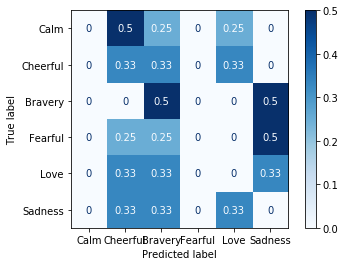

In [6]:
print_res_6_way("Random Oversampling",x_os,y_os,random_search_gaussian,themes, verbose = False)
test_res_6_way("Random Oversampling",x_val,y_val,random_search_gaussian,themes)

Best Score: 0.3800
var_smoothing => 1.1083477517856475e-10
Splits: 10
SMOTE Train Accuracy: 44.0000%
[ 1.  3.  3.  5.  2.  3.  5.  3.  1.  1.  6.  3.  6.  1.  3.  6.  6.  1.
  3.  5.  6.]
[ 1.  1.  1.  1.  2.  2.  2.  3.  3.  3.  3.  4.  4.  4.  4.  5.  5.  5.
  6.  6.  6.]
SMOTE Validation Accuracy: 19.05%
SMOTE F1-score: 0.18
SMOTE Precision Score: 0.24
SMOTE Recall Score: 0.19
SMOTE ROC-AUC Score: 0.51
SMOTE ROC-AUC Score: 0.67
SMOTE ROC-AUC Score: 0.45
SMOTE ROC-AUC Score: 0.50
SMOTE ROC-AUC Score: 0.42
SMOTE ROC-AUC Score: 0.56


(19.047619047619047, 0.1841029341029341)

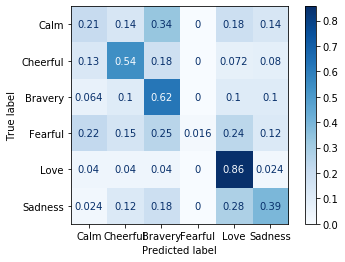

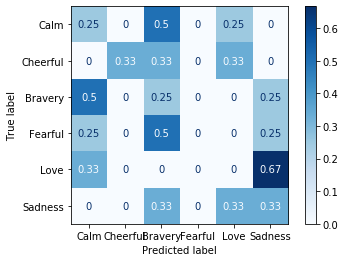

In [7]:
print_res_6_way("SMOTE",x_smote,y_smote,random_search_gaussian,themes)
test_res_6_way("SMOTE",x_val,y_val,random_search_gaussian,themes)

This cell instantiates the Complement Naive Bayes object and the hyperparameter search object.

In [8]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# 23.81% 0.23
feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(f_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 61) (750,)
(750, 61) (750,)


In [9]:
# ComplementNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 10
rand_seed = 3249807

parameters = {
    'alpha':uniform(loc=0,scale=1.0), 
    'fit_prior':[True, False], 
    'norm' : [True, False]
}
cnb = ComplementNB()
random_search_complement = RandomizedSearchCV(cnb, parameters,cv=k_folds,\
                                              n_iter=random_search_iterations,\
                                              random_state=rand_seed,n_jobs=-1)

The following cells are where the Complement Naive Bayes model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set

Best Score: 0.2916
Vanilla Train Accuracy: 32.9177%
[ 1.  3.  1.  3.  1.  1.  1.  3.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  3.  1.  1.]
[ 1.  1.  1.  1.  2.  2.  2.  3.  3.  3.  3.  4.  4.  4.  4.  5.  5.  5.
  6.  6.  6.]
Vanilla Validation Accuracy: 14.29%
Vanilla F1-score: 0.08
Vanilla Precision Score: 0.07
Vanilla Recall Score: 0.14
Vanilla ROC-AUC Score: 0.31
Vanilla ROC-AUC Score: 0.50
Vanilla ROC-AUC Score: 0.54
Vanilla ROC-AUC Score: 0.50
Vanilla ROC-AUC Score: 0.50
Vanilla ROC-AUC Score: 0.50


(14.285714285714285, 0.083900226757369606)

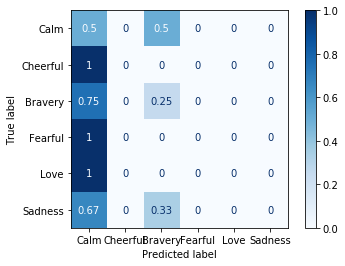

In [10]:
print_res_6_way("Vanilla",x_train,y_train,random_search_complement, themes, verbose = False)
test_res_6_way("Vanilla",x_val,y_val,random_search_complement, themes)

Best Score: 0.2933
Random Oversampling Train Accuracy: 34.5333%
[ 1.  3.  3.  3.  2.  3.  5.  3.  4.  1.  3.  4.  3.  1.  3.  3.  3.  3.
  3.  5.  1.]
[ 1.  1.  1.  1.  2.  2.  2.  3.  3.  3.  3.  4.  4.  4.  4.  5.  5.  5.
  6.  6.  6.]
Random Oversampling Validation Accuracy: 23.81%
Random Oversampling F1-score: 0.23
Random Oversampling Precision Score: 0.32
Random Oversampling Recall Score: 0.24
Random Oversampling ROC-AUC Score: 0.54
Random Oversampling ROC-AUC Score: 0.67
Random Oversampling ROC-AUC Score: 0.46
Random Oversampling ROC-AUC Score: 0.60
Random Oversampling ROC-AUC Score: 0.44
Random Oversampling ROC-AUC Score: 0.50


(23.809523809523807, 0.23015873015873015)

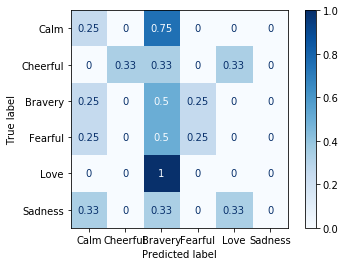

In [11]:
print_res_6_way("Random Oversampling",x_os,y_os,random_search_complement,themes, verbose = False)
test_res_6_way("Random Oversampling",x_val,y_val,random_search_complement,themes)

Best Score: 0.3107
alpha => 0.2557277072168217
fit_prior => False
norm => False
Splits: 10
SMOTE Train Accuracy: 35.7333%
[ 5.  3.  6.  3.  2.  3.  5.  3.  3.  1.  6.  3.  3.  1.  3.  3.  3.  3.
  3.  5.  1.]
[ 1.  1.  1.  1.  2.  2.  2.  3.  3.  3.  3.  4.  4.  4.  4.  5.  5.  5.
  6.  6.  6.]
SMOTE Validation Accuracy: 14.29%
SMOTE F1-score: 0.12
SMOTE Precision Score: 0.17
SMOTE Recall Score: 0.14
SMOTE ROC-AUC Score: 0.41
SMOTE ROC-AUC Score: 0.67
SMOTE ROC-AUC Score: 0.46
SMOTE ROC-AUC Score: 0.50
SMOTE ROC-AUC Score: 0.42
SMOTE ROC-AUC Score: 0.44


(14.285714285714285, 0.11904761904761904)

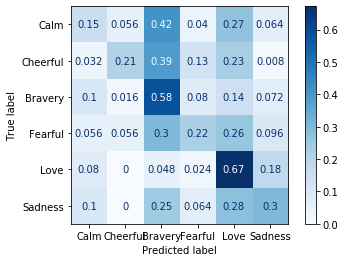

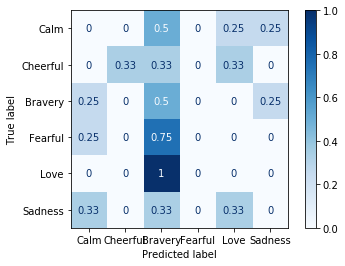

In [12]:
print_res_6_way("SMOTE",x_smote,y_smote,random_search_complement,themes)
test_res_6_way("SMOTE",x_val,y_val,random_search_complement,themes)

This cell instantiates the Multinomial Naive Bayes object and the hyperparameter search object.

In [13]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# 23.81% 0.22
feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(f_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 61) (750,)
(750, 61) (750,)


In [14]:
# MultinomialNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 10

parameters = {
    'alpha':uniform(loc=0,scale=1.0), 
    'fit_prior':[True, False]
}
mnb = MultinomialNB()
random_search_multinomial = RandomizedSearchCV(mnb, parameters,cv=k_folds,\
                                            n_iter=random_search_iterations,\
                                            random_state=rand_seed,n_jobs=-1)

The following cells are where the Multinomial Naive Bayes model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set

Best Score: 0.3092
Vanilla Train Accuracy: 36.9077%
[ 1.  3.  1.  4.  4.  1.  1.  4.  4.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  4.  1.  1.]
[ 1.  1.  1.  1.  2.  2.  2.  3.  3.  3.  3.  4.  4.  4.  4.  5.  5.  5.
  6.  6.  6.]
Vanilla Validation Accuracy: 9.52%
Vanilla F1-score: 0.04
Vanilla Precision Score: 0.03
Vanilla Recall Score: 0.10
Vanilla ROC-AUC Score: 0.37
Vanilla ROC-AUC Score: 0.50
Vanilla ROC-AUC Score: 0.47
Vanilla ROC-AUC Score: 0.35
Vanilla ROC-AUC Score: 0.50
Vanilla ROC-AUC Score: 0.50


(9.5238095238095237, 0.040100250626566421)

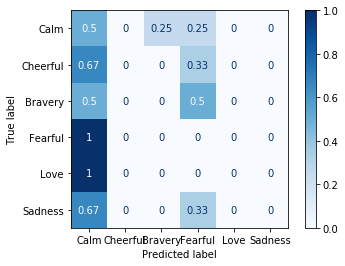

In [15]:
print_res_6_way("Vanilla",x_train,y_train,random_search_multinomial, themes, verbose = False)
test_res_6_way("Vanilla",x_val,y_val,random_search_multinomial, themes)

Best Score: 0.3067
Random Oversampling Train Accuracy: 36.9333%
[ 1.  3.  3.  3.  2.  3.  5.  3.  4.  1.  3.  4.  3.  1.  3.  3.  3.  3.
  3.  1.  1.]
[ 1.  1.  1.  1.  2.  2.  2.  3.  3.  3.  3.  4.  4.  4.  4.  5.  5.  5.
  6.  6.  6.]
Random Oversampling Validation Accuracy: 23.81%
Random Oversampling F1-score: 0.22
Random Oversampling Precision Score: 0.31
Random Oversampling Recall Score: 0.24
Random Oversampling ROC-AUC Score: 0.51
Random Oversampling ROC-AUC Score: 0.67
Random Oversampling ROC-AUC Score: 0.46
Random Oversampling ROC-AUC Score: 0.60
Random Oversampling ROC-AUC Score: 0.47
Random Oversampling ROC-AUC Score: 0.50


(23.809523809523807, 0.22486772486772488)

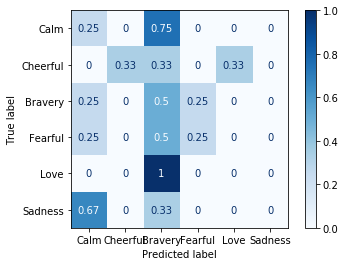

In [16]:
print_res_6_way("Random Oversampling",x_os,y_os,random_search_multinomial,themes, verbose = False)
test_res_6_way("Random Oversampling",x_val,y_val,random_search_multinomial,themes)

Best Score: 0.3347
alpha => 0.820055696700619
fit_prior => False
Splits: 10
SMOTE Train Accuracy: 38.4000%
[ 3.  3.  6.  6.  2.  3.  6.  3.  3.  1.  6.  3.  3.  1.  3.  3.  3.  3.
  3.  3.  1.]
[ 1.  1.  1.  1.  2.  2.  2.  3.  3.  3.  3.  4.  4.  4.  4.  5.  5.  5.
  6.  6.  6.]
SMOTE Validation Accuracy: 14.29%
SMOTE F1-score: 0.12
SMOTE Precision Score: 0.17
SMOTE Recall Score: 0.14
SMOTE ROC-AUC Score: 0.41
SMOTE ROC-AUC Score: 0.67
SMOTE ROC-AUC Score: 0.43
SMOTE ROC-AUC Score: 0.50
SMOTE ROC-AUC Score: 0.50
SMOTE ROC-AUC Score: 0.39


(14.285714285714285, 0.11624649859943978)

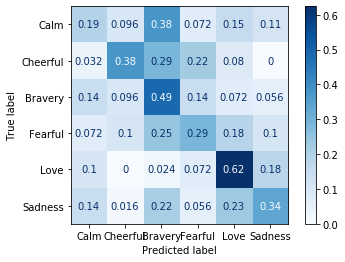

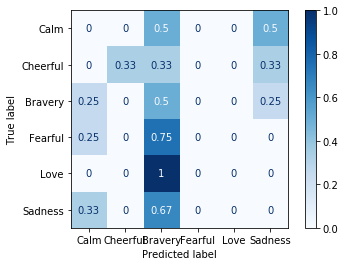

In [17]:
print_res_6_way("SMOTE",x_smote,y_smote,random_search_multinomial,themes)
test_res_6_way("SMOTE",x_val,y_val,random_search_multinomial,themes)